In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Airline Pass
from statsmodels.datasets import get_rdataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/refs/heads/master/airline-passengers.csv')

In [6]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.dtypes

Month object
Passengers int64
dtype: object

In [8]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
df.dtypes

Month datetime64[ns]
Passengers int64
dtype: object

In [11]:
df.set_index('Month', inplace=True)

In [12]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


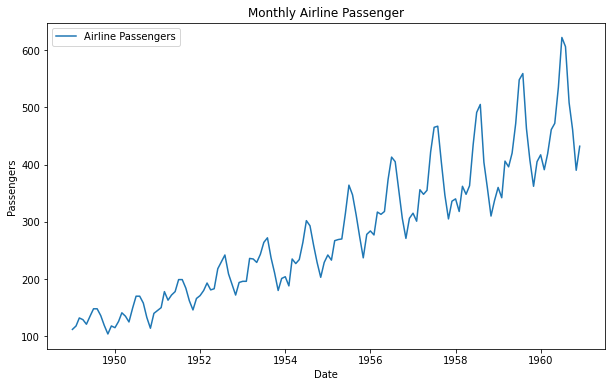

In [13]:
# visualizing Data on Time Series

plt.figure(figsize=(10,6))
plt.plot(df['Passengers'], label= 'Airline Passengers')
plt.title('Monthly Airline Passenger')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [14]:
# check stationary with ADF test

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statstics:{ result[0]}')
    print(f'p value: {result[1]}')
    print('Stationary' if result[1 ]< 0.05 else 'Non stationary')

In [15]:
adf_test(df['Passengers'])

ADF Statstics:0.8153688792060668
p value: 0.9918802434376413
Non stationary


In [16]:
# convert it into stationary format

df['diff1']  = df['Passengers'].diff()
print('\n After First diff result:')
adf_test(df['diff1'].dropna())


 After First diff result:
ADF Statstics:-2.8292668241699994
p value: 0.0542132902838255
Non stationary


In [17]:
# Seasonal Difference(s=12)
df['Seasonal_diff']  = df['Passengers'].diff(12)
print('\n After Seasonal_diff result:')
adf_test(df['Seasonal_diff'].dropna())


 After Seasonal_diff result:
ADF Statstics:-3.3830207264924814
p value: 0.011551493085514952
Stationary


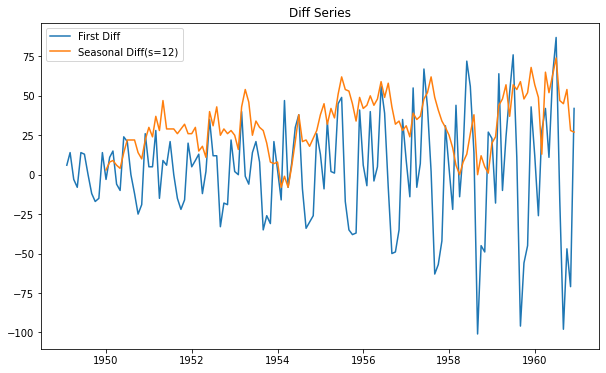

In [18]:
# Plot Diff series
plt.figure(figsize=(10,6))
plt.plot(df['diff1'], label= 'First Diff')
plt.plot(df['Seasonal_diff'], label= 'Seasonal Diff(s=12)')
plt.title('Diff Series')
plt.legend()
plt.show()

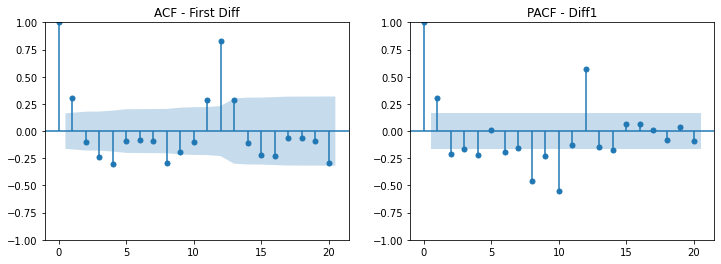

In [19]:
# ACF and PACF

plt.figure(figsize=(12,4))
plt.subplot(121)
plot_acf(df['diff1'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF - First Diff')
plt.subplot(122)
plot_pacf(df['diff1'].dropna(), lags=20, ax=plt.gca())
plt.title('PACF - Diff1')
plt.show()